In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
df = pd.read_csv('Salary_dataset.csv')

In [9]:
df.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [10]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

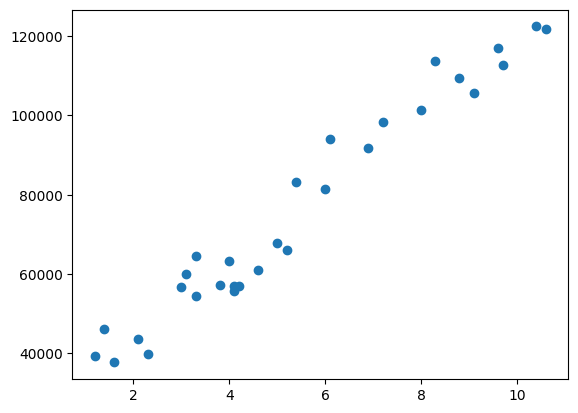

In [11]:
plt.scatter(df['YearsExperience'],df['Salary'])

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
x = df['YearsExperience']
y = df['Salary']

In [14]:
print(x)
print(y)

0      1.2
1      1.4
2      1.6
3      2.1
4      2.3
5      3.0
6      3.1
7      3.3
8      3.3
9      3.8
10     4.0
11     4.1
12     4.1
13     4.2
14     4.6
15     5.0
16     5.2
17     5.4
18     6.0
19     6.1
20     6.9
21     7.2
22     8.0
23     8.3
24     8.8
25     9.1
26     9.6
27     9.7
28    10.4
29    10.6
Name: YearsExperience, dtype: float64
0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [16]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred = model.predict(x_test)

In [18]:
y_pred

array([[115815.30756236],
       [ 71512.92534771],
       [102618.85328566],
       [ 75283.34085534],
       [ 55488.65944028],
       [ 60201.67882482],
       [122413.53470072],
       [107331.8726702 ],
       [ 63029.49045554],
       [ 35693.97802523]])

In [19]:
from sklearn.metrics import mean_squared_error,r2_score

In [20]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean squared Error :{mse}")
print(f"R2 Score : {r2}")

Mean squared Error :35301898.88713486
R2 Score : 0.9553063138044949


C:\Users\Kinal\AppData\Local\Temp\ipykernel_6544\1630506063.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


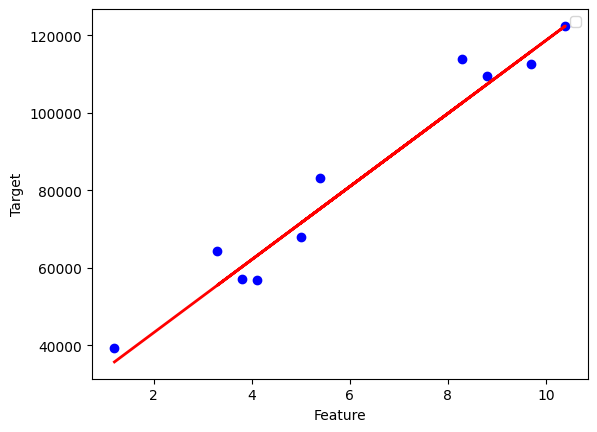

In [21]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='red',linewidth = 2)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [23]:
ridge_reg = Ridge()

In [24]:
parameters = {'alpha':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50,60,100]}
ridgecv = GridSearchCV(ridge_reg,parameters,scoring = 'neg_mean_squared_error',cv=5)

In [25]:
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                   14, 15, 16, 17, 18, 19, 20, 30, 40, 50, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [26]:
print(ridgecv.best_params_)

{'alpha': 1}


In [27]:
print(ridgecv.best_score_)

-33982969.605803795


In [28]:
ridgecv.predict(x_test)

array([[115513.56258387],
       [ 71520.83132968],
       [102409.34476348],
       [ 75264.89356408],
       [ 55608.56683348],
       [ 60288.64462648],
       [122065.67149407],
       [107089.42255648],
       [ 63096.69130228],
       [ 35952.24010289]])

In [29]:
ridge_pred = ridgecv.predict(x_test)

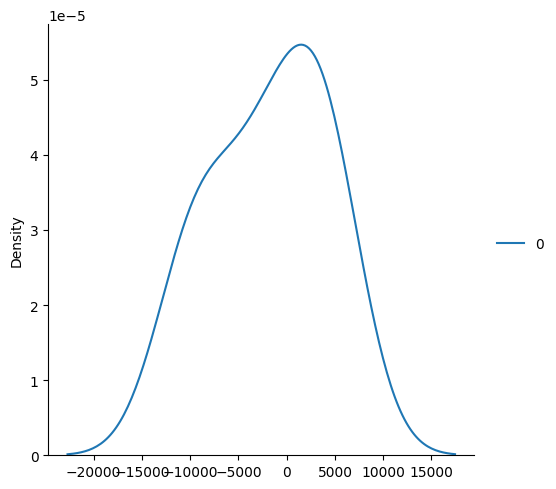

In [30]:
import seaborn as sns

sns.displot(ridge_pred - y_test,kind='kde')

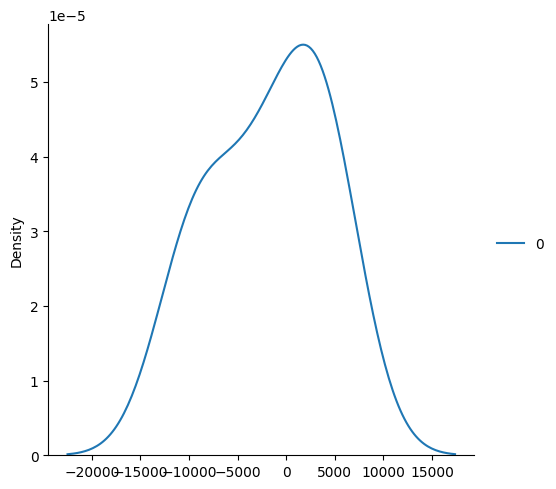

In [31]:
sns.displot(y_pred - y_test,kind='kde')

In [32]:
score = r2_score(ridge_pred,y_test)

In [33]:
score

0.9530785489047398

In [34]:
from sklearn.linear_model import Lasso

In [35]:
lasso = Lasso()

In [118]:
param = {'alpha' : [1,2,3,5,6,7,8,9,10,12,15,16,17,18,19,20,30,40,50,500]}
lasso_cv = GridSearchCV(lasso,param,scoring='neg_mean_squared_error',cv=20)

In [119]:
print(x_train)
print(y_train)

[[ 2.3]
 [ 5.2]
 [ 3. ]
 [ 4.2]
 [ 4.1]
 [ 8. ]
 [ 1.4]
 [ 1.6]
 [ 9.1]
 [ 2.1]
 [ 7.2]
 [ 9.6]
 [ 6. ]
 [10.6]
 [ 6.9]
 [ 3.3]
 [ 4. ]
 [ 4.6]
 [ 6.1]
 [ 3.1]]
[[ 39892.]
 [ 66030.]
 [ 56643.]
 [ 57082.]
 [ 55795.]
 [101303.]
 [ 46206.]
 [ 37732.]
 [105583.]
 [ 43526.]
 [ 98274.]
 [116970.]
 [ 81364.]
 [121873.]
 [ 91739.]
 [ 54446.]
 [ 63219.]
 [ 61112.]
 [ 93941.]
 [ 60151.]]


In [120]:
lasso_cv.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 15, 16, 17,
                                   18, 19, 20, 30, 40, 50, 500]},
             scoring='neg_mean_squared_error')

In [121]:
lasso_cv.best_params_

{'alpha': 500}

In [122]:
lasso_cv.best_score_

-35487231.79414276

In [123]:
lasso_cv.predict(x_test)

array([115492.9358072 ,  71521.37176924, 102395.02311504,  75263.63253843,
        55616.7635002 ,  60294.58946168, 122041.89215327, 107072.84907652,
        63101.28503857,  35969.89446196])

In [124]:
lasso_pred = lasso_cv.predict(x_test).reshape(-1,1)

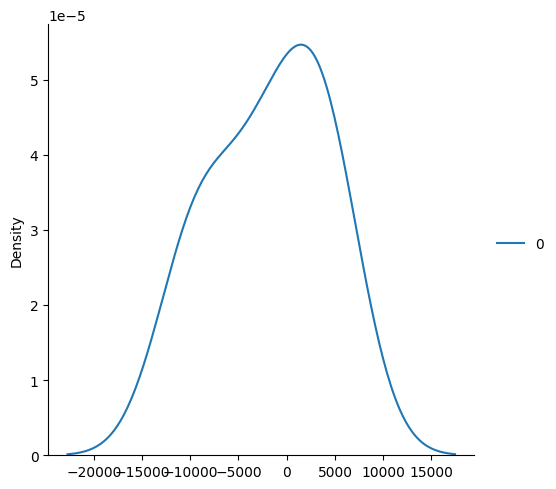

In [125]:
sns.displot(lasso_pred - y_test,kind='kde')

In [126]:
score = r2_score(lasso_pred,y_test)
score

0.9530128197720431